In [18]:
#モジュールの読み込み
import matplotlib.pyplot as plt
from matplotlib import patches
import math
import numpy as np
import random
import pandas as pd
%matplotlib inline

In [19]:
#数値(W:部屋の幅,H:部屋の高さ,:wh:長方形の高さと幅,xy:長方形の座標)
W = 4
H = 6
wh = [[1,1.5],[2,1],[1.5,2],[1.5,1.5],[2,1],[1,1],[1,1]]
xy = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]

In [20]:
#DataFrame処理
wh_df = pd.DataFrame(data=(wh),columns=("w","h"))
xy_df = pd.DataFrame(data=(xy),columns=("x","y"))
Rect = pd.concat([wh_df,xy_df],axis=1)
Rect["x+w"] = Rect["x"]+Rect["w"]
Rect["y+h"] = Rect["y"]+Rect["h"]
rename = list(np.arange(0, len(Rect)))
Rect

,w,h,x,y,x+w,y+h
0,1.0,1.5,0,0,1.0,1.5
1,2.0,1.0,0,0,2.0,1.0
2,1.5,2.0,0,0,1.5,2.0
3,1.5,1.5,0,0,1.5,1.5
4,2.0,1.0,0,0,2.0,1.0
5,1.0,1.0,0,0,1.0,1.0
6,1.0,1.0,0,0,1.0,1.0


In [21]:
#Axesオブジェクトに長方形を配置
def Rect_place(rect,n):
    global ax,fig
    ax.grid()
    colors="#"+''.join([random.choice('0123456789ABCDEF') for i in range(3)])
    r = patches.Rectangle( xy=(rect.loc[n]["x"],rect.loc[n]["y"]) , width=rect.loc[n]["w"], height=rect.loc[n]["h"], color=colors)
    ax.add_patch(r)

In [22]:
#index：ｎがそれより若いindexの長方形と重なっていないか確認.重なっていなければ、Trueを返す
def overlap(rect,n):
    result = []
    for i in range(n):
        xn = rect.loc[n]["x"]
        xi = rect.loc[i]["x"]
        wn = rect.loc[n]["w"]
        wi = rect.loc[i]["w"]
        yn = rect.loc[n]["y"]
        yi = rect.loc[i]["y"]
        hn = rect.loc[n]["h"]
        hi = rect.loc[i]["h"]
        result.append(not((max(xn,xi)<min(xn+wn,xi+wi))and(max(yn,yi)<min(yn+hn,yi+hi))))#重なっていなければ、True
    return all(result)#一つでもFalseがあればFalse

In [23]:
#index:nが範囲内にあるか確認.範囲内にあれば、Trueを返す
def Out(rect,n):
    xn = rect.loc[n]["x"]
    yn = rect.loc[n]["y"]
    wn = rect.loc[n]["w"]
    hn = rect.loc[n]["h"]
    return xn>=0 and yn>=0 and xn+wn<=W and yn+hn<=H

In [24]:
#長方形の右下に新しい長方形を配置する。
def right_bottom(rect,n):
    global finish
    if n == 0:
        rect.at[n, "x"] = 0
        rect.at[n, "y"] = 0
        finish = True
    elif n == 1:
        rect.at[n, "x"] = rect.loc[0]["w"]
        rect.at[n, "y"] = rect.loc[0]["y"]
        if not overlap(rect,n) and Out(rect,n):
            rect.at[n, "x"] = 0
            rect.at[n, "y"] = rect.loc[0]["h"]
        finish = True
    else:
        i = 1
        while True:
            xw = rect.loc[i]["x"]+rect.loc[i]["w"]
            rect.at[n, "x"] = xw
            rect.at[n, "y"] = rect.loc[i]["y"]
            i += 1
            if overlap(rect,n) and Out(rect,n):#重ならず、範囲内にあれば、True
                finish = True
                break
            if i == n:#n回繰り返したらやめる
                finish = False
                break
    Rect["x+w"] = Rect["x"]+Rect["w"]
    Rect["y+h"] = Rect["y"]+Rect["h"]
    return finish

In [25]:
#長方形の左上に新しい長方形を配置する
def left_top(rect,n):
    global finish
    if finish == False:
        #y+hに従って並べ替える
        rect_yh = rect.sort_values('y+h', ascending=True)
        #ラベルを張りなおす
        rect_yh = rect_yh.set_axis(list(np.arange(0, len(rect))), axis=0)
        i = 0
        while True:
            rect.at[n,"x"] = rect_yh.loc[i]["x"]
            rect.at[n,"y"] = rect_yh.loc[i]["y+h"]
            i += 1
            if overlap(rect,n) and Out(rect,n):#重ならず、範囲内にあれば、True
                finish = True
                break
            if i == n:#n回繰り返したらやめる
                finish = False
                break
    Rect["x+w"] = Rect["x"]+Rect["w"]
    Rect["y+h"] = Rect["y"]+Rect["h"]
    return finish

In [28]:
#一番上のさらに左
def top_left(rect,n):
    global finish
    if finish == False:
        #y+h,xに従って並べ替える
        rect_yh = rect.sort_values('y+h', ascending=True)
        rect_x = rect.sort_values('x', ascending=True)
        #ラベルを張りなおす
        rect_yh = rect_yh.set_axis(list(np.arange(0, len(rect))), axis=0)
        rect_x = rect_x.set_axis(list(np.arange(0, len(rect))), axis=0)
        i = 0
        while True:
            rect.at[n,"y"] = rect_yh.loc[i]["y+h"]#高さ順に代入していく。
            j = 0
            while True:
                rect.at[n,"x"] = rect_x.loc[j]["x"]#左順に代入していく.。
                if overlap(rect,n) and Out(rect,n):#重ならず、範囲内にあれば、True
                    finish = True
                    break
                if j == n:#n回繰り返したらやめる
                    finish = False
                    break
                j += 1
            if overlap(rect,n) and Out(rect,n):#重ならず、範囲内にあれば、True
                finish = True
                break
            if i == n:#n回繰り返したらやめる
                finish = False
                break
            i += 1
    Rect["x+w"] = Rect["x"]+Rect["w"]
    Rect["y+h"] = Rect["y"]+Rect["h"]
    return finish

True
True
True
True
True
True
True


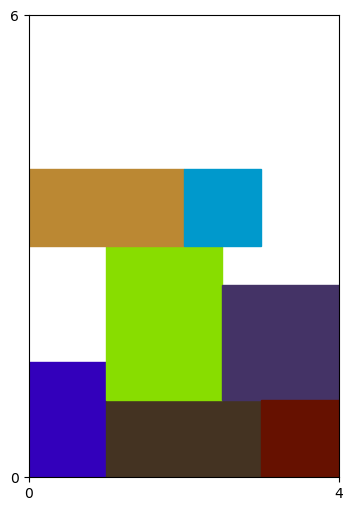

In [29]:
#実行
#Axesオブジェクトを作成
fig, ax = plt.subplots(figsize=(W,H))
ax.set_xticks([0, W])
ax.set_yticks([0, H])
ax.grid()
R = 7
finish = False
for j in range(R):
    right_bottom(Rect,j)
    left_top(Rect,j)
    top_left(Rect,j)
    print(finish)

for n in range(R):
    Rect_place(Rect,n)

#図形を描画
plt.show()